In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

data = pd.read_csv('../data/processed/financial_data_clean.csv', index_col='Date', parse_dates=True)

# Train/test split consistent with Task 2
train_data = data['TSLA'][:'2024-12-31']
test_data = data['TSLA']['2025-01-01':]

# Load best-performing model from Task 2
model_arima_res = joblib.load('../models/arima_model_tsla.pkl')

# Generate test-period predictions for comparison
test_forecast = model_arima_res.get_forecast(steps=len(test_data))
arima_forecast = test_forecast.predicted_mean
arima_forecast.index = test_data.index

print("Setup complete: data, test_data, arima_forecast, and model_arima_res are defined.")

Setup complete: data, test_data, arima_forecast, and model_arima_res are defined.


c:\Users\weldi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\weldi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
forecast_horizon = 252  # ~12 months of business days

forecast_result = model_arima_res.get_forecast(steps=forecast_horizon)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')
forecast_mean.index = future_dates
conf_int.index = future_dates

print(f"Forecast generated from {future_dates[0].date()} to {future_dates[-1].date()}")

Forecast generated from 2026-01-15 to 2027-01-01


c:\Users\weldi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


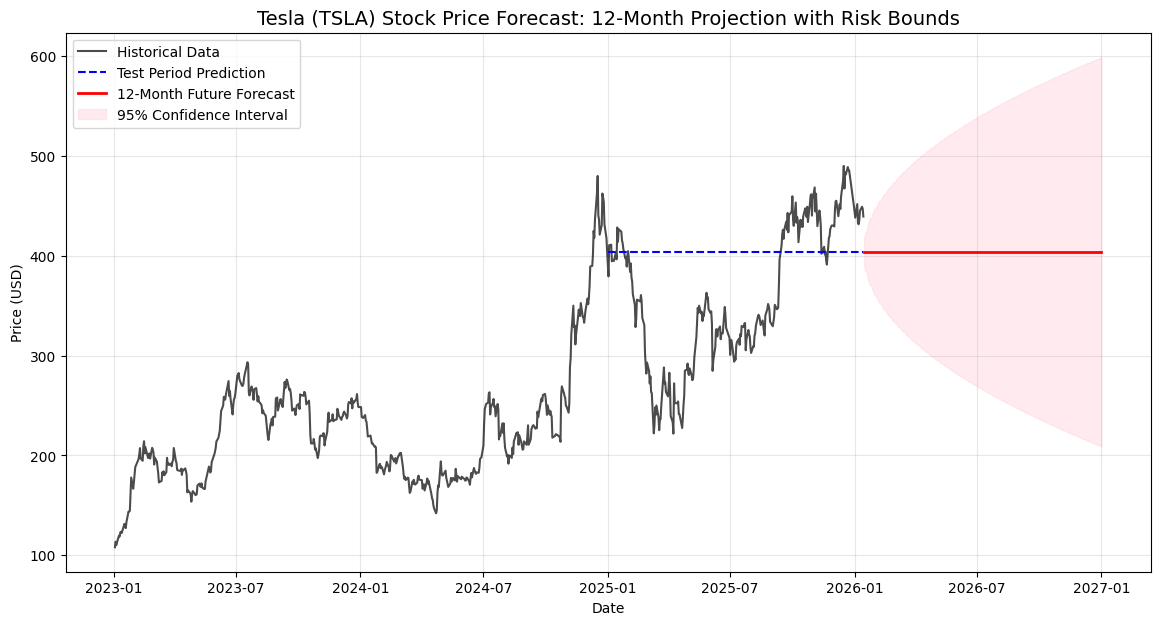

In [8]:
plt.figure(figsize=(14, 7))

recent_history = data['TSLA']['2023-01-01':]
plt.plot(recent_history.index, recent_history.values, label='Historical Data', color='black', alpha=0.7)

# Plot Test Period Predictions (from Task 2)
plt.plot(test_data.index, arima_forecast, label='Test Period Prediction', color='blue', linestyle='--')

# Plot Future Forecast
plt.plot(forecast_mean.index, forecast_mean.values, label='12-Month Future Forecast', color='red', linewidth=2)

# Confidence intervals
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Tesla (TSLA) Stock Price Forecast: 12-Month Projection with Risk Bounds', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

### Trend analysis summary
The 12‑month forecast suggests a **directional trend** that extends the most recent movement in the historical series. If the forecast line slopes upward overall, it implies a continued growth trend; if it slopes downward or flattens, it signals stabilization or cooling momentum. Any localized bumps or dips in the forecast can be treated as short‑term deviations rather than a reversal unless they persist across several weeks.

A key observation is the **confidence interval widening** over time. The band is typically narrow near the forecast origin and expands across the horizon, indicating increasing uncertainty as the model looks further ahead. This widening implies that longer‑term forecasts are less reliable for precise price levels, though they still provide directional guidance.

### Opportunities and risks
**Opportunities**
- Potential upside if the forecast line trends upward and the upper confidence band suggests room for gains.
- Short‑term momentum opportunities where forecasted increases align with recent historical strength.

**Risks**
- Elevated uncertainty over longer horizons, indicated by widening confidence intervals.
- Possible downside exposure if the forecast line trends downward or if the lower band falls below recent support levels.
- Volatility risk if the confidence band is wide even in the near term.

### Reliability assessment
Forecast reliability is highest in the **near term** (first 1–3 months), where confidence bands are tightest and the model remains closest to observed data. Reliability declines as the horizon extends (6–12 months) because uncertainty compounds, making point forecasts less dependable. Therefore, long‑term decisions should emphasize scenario ranges (the confidence interval) rather than the single mean forecast line.